

---

What to find out from the Dataset:
### Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?


---



We cannot rely on the correlation of a small dataset. The correlation value for two datapoints will always be a 1 .When a dataset has two random datapoints a straight line can be easily drawn. However when a dataset has a minimum of 3 datapoints it will have a better accuracy when it comes to correlation. The chance of drawing a straight line through 3 random datapoints is very low.

The more dataponts we have. The better we can rely on the output and its predictions.

Because of this reason I'd like to focus on countries with a minimum of 3 datapoints.

This way we have more confidence that the observed correlation isnt just the result of random chance.



For this assignment you need to answer the following question:

Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?

💡Note

Be aware of the difference between correlation and causation here. A might cause B. B might cause A. But both A and B could be caused by an unknown C as well.

One way to express income inequality is to look at a country's "Gini coefficient" (also known as "Gini index"). You can find a dataset of Gini Coefficients here(https://ourworldindata.org/income-inequality#high-income-countries-tend-to-have-lower-inequality).

You can find a dataset with historical GDP data here(https://ourworldindata.org/economic-growth#gdp-per-capita-over-the-long-run).

To be able to answer this question you would want to calculate the "correlation coefficient" of the GDP and the Gini coefficient. But before you can do that you may need to resample the data so a correlation coefficient can be calculated.

💡 Note

If you want to learn more about calculating correlations using pandas and other Python libraries view this short video(https://www.youtube.com/watch?v=TRNaMGkdn-A).



In [ ]:
# Default starting template
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

%load_ext google.colab.data_table

df_gini = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/Assignment_Income_inequality_in_relation_to_GDP/main/inequality.csv')
df_gdp = pd.read_csv('https://raw.githubusercontent.com/DASH-OF-GLITTER/Assignment_Income_inequality_in_relation_to_GDP/main/national-gdp-wb.csv')

df_gdp_shrink = df_gdp.drop(columns=['Code'])
df_gini_shrink = df_gini.iloc[:,0:3]

df_gdp_shrink.rename(columns ={'Entity':'Country', 'GDP, PPP (constant 2017 international $)':'GDP_PPP_USD'},inplace=True)
df_gini_shrink.rename(columns ={'Gini coefficient (before tax) (World Inequality Database)':'Gini_coefficient_before_tax'}, inplace=True)
display(df_gini_shrink)
display(df_gdp_shrink)

df_gdp_gini = pd.merge(df_gini_shrink, df_gdp_shrink, on=['Country', 'Year'])
display(df_gdp_gini)


Country  Year  Gini_coefficient_before_tax
0     Afghanistan  1980                          NaN
1     Afghanistan  1981                          NaN
2     Afghanistan  1982                          NaN
3     Afghanistan  1983                          NaN
4     Afghanistan  1984                          NaN
...           ...   ...                          ...
9922     Zimbabwe  2017                     0.635799
9923     Zimbabwe  2018                          NaN
9924     Zimbabwe  2019                     0.685154
9925     Zimbabwe  2020                          NaN
9926     Zimbabwe  2021                          NaN

[9927 rows x 3 columns]

Country  Year  GDP_PPP_USD
0     Afghanistan  2002  26890054000
1     Afghanistan  2003  29265058000
2     Afghanistan  2004  29678901000
3     Afghanistan  2005  33011757000
4     Afghanistan  2006  34780330000
...           ...   ...          ...
6341     Zimbabwe  2017  34396336000
6342     Zimbabwe  2018  36119544000
6343     Zimbabwe  2019  33832294000
6344     Zimbabwe  2020  31187640000
6345     Zimbabwe  2021  33828616000

[6346 rows x 3 columns]

Country  Year  Gini_coefficient_before_tax  GDP_PPP_USD
0     Afghanistan  2002                          NaN  26890054000
1     Afghanistan  2003                          NaN  29265058000
2     Afghanistan  2004                          NaN  29678901000
3     Afghanistan  2005                          NaN  33011757000
4     Afghanistan  2006                          NaN  34780330000
...           ...   ...                          ...          ...
5166     Zimbabwe  2017                     0.635799  34396336000
5167     Zimbabwe  2018                          NaN  36119544000
5168     Zimbabwe  2019                     0.685154  33832294000
5169     Zimbabwe  2020                          NaN  31187640000
5170     Zimbabwe  2021                          NaN  33828616000

[5171 rows x 4 columns]


---


### Cleaning / Prepping Data


---



In [ ]:
df_gdp_gini.columns


Index(['Country', 'Year', 'Gini_coefficient_before_tax', 'GDP_PPP_USD'], dtype='object')

In [ ]:
df_gdp_gini_clean = df_gdp_gini.dropna()
df_gdp_gini_clean['Correlation'] = 0
df_gdp_gini_clean['P_Val'] = 0
df_gdp_gini_clean

<ipython-input-3-087358df4b39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_gini_clean['Correlation'] = 0
<ipython-input-3-087358df4b39>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_gini_clean['P_Val'] = 0


Country  Year  Gini_coefficient_before_tax  GDP_PPP_USD  \
6     Afghanistan  2008                     0.524524  41143038000   
10    Afghanistan  2012                     0.492656  64675180000   
15    Afghanistan  2017                     0.515393  74711925000   
26        Albania  1996                     0.467630  15554487000   
32        Albania  2002                     0.481698  20609907000   
...           ...   ...                          ...          ...   
5140     Zimbabwe  1991                     0.624443  28868880000   
5145     Zimbabwe  1996                     0.624443  32048108000   
5160     Zimbabwe  2011                     0.624443  26483784000   
5166     Zimbabwe  2017                     0.635799  34396336000   
5168     Zimbabwe  2019                     0.685154  33832294000   

      Correlation  P_Val  
6               0      0  
10              0      0  
15              0      0  
26              0      0  
32              0      0  
...           ...    ...  
5140            0      0  
5145            0      0  
5160            0      0  
5166            0      0  
5168            0      0  

[1987 rows x 6 columns]


---


### Calculating Correlation and P-Value


---



In [ ]:
def calculate_corr_pval(c_name):
  df_temp = df_gdp_gini_clean.loc[df_gdp_gini_clean['Country'] == c_name]
  if df_temp['Country'].count() > 1:
    #display(df_temp)
    corr_result = pearsonr(df_temp['Gini_coefficient_before_tax'], df_temp['GDP_PPP_USD'])[0]
    pval_result = pearsonr(df_temp['Gini_coefficient_before_tax'], df_temp['GDP_PPP_USD'])[1]
    #df_temp.loc[df_temp['Country'] == c_name,'Correlation'] = corr_result
    #df_temp.loc[df_temp['Country'] == c_name,'P_Val'] = pval_result
    #display(df_temp)
    df_gdp_gini_clean.loc[df_gdp_gini_clean['Country'] == c_name,'Correlation'] = corr_result
    df_gdp_gini_clean.loc[df_gdp_gini_clean['Country'] == c_name,'P_Val'] = pval_result


#calculate_corr_pval("Afghanistan")
list_of_countries = df_gdp_gini_clean['Country'].unique()
for c in list_of_countries:
    calculate_corr_pval(c)

display(df_gdp_gini_clean)

Country  Year  Gini_coefficient_before_tax  GDP_PPP_USD  \
6     Afghanistan  2008                     0.524524  41143038000   
10    Afghanistan  2012                     0.492656  64675180000   
15    Afghanistan  2017                     0.515393  74711925000   
26        Albania  1996                     0.467630  15554487000   
32        Albania  2002                     0.481698  20609907000   
...           ...   ...                          ...          ...   
5140     Zimbabwe  1991                     0.624443  28868880000   
5145     Zimbabwe  1996                     0.624443  32048108000   
5160     Zimbabwe  2011                     0.624443  26483784000   
5166     Zimbabwe  2017                     0.635799  34396336000   
5168     Zimbabwe  2019                     0.685154  33832294000   

      Correlation     P_Val  
6       -0.488159  0.675337  
10      -0.488159  0.675337  
15      -0.488159  0.675337  
26       0.665268  0.050526  
32       0.665268  0.050526  
...           ...       ...  
5140     0.566724  0.319166  
5145     0.566724  0.319166  
5160     0.566724  0.319166  
5166     0.566724  0.319166  
5168     0.566724  0.319166  

[1987 rows x 6 columns]


---


### Correlation significance


---



In [ ]:
df_countries_group = df_gdp_gini_clean.groupby(['Country', 'Correlation', 'P_Val']).count().reset_index()
df_countries_group.drop(columns=['Year', 'Gini_coefficient_before_tax', 'GDP_PPP_USD'], inplace=True)
df_countries_group['Correlation_significance'] = ''
df_countries_group

Country  Correlation         P_Val Correlation_significance
0    Afghanistan    -0.488159  6.753375e-01                         
1        Albania     0.665268  5.052564e-02                         
2        Algeria    -0.921083  1.217312e-09                         
3         Angola    -0.318071  6.819292e-01                         
4      Argentina    -0.857392  5.444614e-06                         
..           ...          ...           ...                      ...
146   Uzbekistan    -0.828859  1.711413e-01                         
147      Vietnam    -0.567187  5.444851e-02                         
148        World    -0.924334  4.358493e-14                         
149       Zambia     0.546241  1.281113e-01                         
150     Zimbabwe     0.566724  3.191655e-01                         

[151 rows x 4 columns]

In [ ]:

def set_correlation_significance(c_name):
  result = ""
  df_temp = df_countries_group.loc[df_countries_group['Country'] == c_name]
  #print(df_temp)
  pval = df_temp["P_Val"].values[0]
  corr = df_temp["Correlation"].values[0]

  if pval <= 0.05:
    if corr >= 0 and corr <= .1:
      result = 'no'
    if (corr > .1 and corr <= .3):
      result = 'weak positive'
    if (corr > .3 and corr <= .5):
      result = 'moderate positive'
    if (corr > .5 and corr <= .7):
      result = 'strong positive'
    if (corr > .7 and corr <= 1):
      result = 'very strong positive'

    if corr <= 0 and corr >= -.1:
      result = 'no'
    if (corr < -.1 and corr >= -.3):
      result = 'weak negative'
    if (corr < -.3 and corr >= -.5):
      result = 'moderate negative'
    if (corr < -.5 and corr >= -.7):
      result = 'strong negative'
    if (corr < -.7 and corr >= -1):
      result = 'very strong negative'

  else:
    result = 'insufficient data'

  df_countries_group.loc[df_countries_group['Country'] == c_name,'Correlation_significance'] = result
  #display(df_temp)

list_of_countries = df_countries_group['Country'].unique()
for c in list_of_countries:
    set_correlation_significance(c)
display(df_countries_group)

Country  Correlation         P_Val Correlation_significance
0    Afghanistan    -0.488159  6.753375e-01        insufficient data
1        Albania     0.665268  5.052564e-02        insufficient data
2        Algeria    -0.921083  1.217312e-09     very strong negative
3         Angola    -0.318071  6.819292e-01        insufficient data
4      Argentina    -0.857392  5.444614e-06     very strong negative
..           ...          ...           ...                      ...
146   Uzbekistan    -0.828859  1.711413e-01        insufficient data
147      Vietnam    -0.567187  5.444851e-02        insufficient data
148        World    -0.924334  4.358493e-14     very strong negative
149       Zambia     0.546241  1.281113e-01        insufficient data
150     Zimbabwe     0.566724  3.191655e-01        insufficient data

[151 rows x 4 columns]

In [ ]:
all_corr_sig = df_countries_group['Correlation_significance'].value_counts(ascending=False)[:]
all_corr_sig

insufficient data       83
very strong positive    24
very strong negative    23
strong positive          8
strong negative          7
no                       4
moderate positive        1
moderate negative        1
Name: Correlation_significance, dtype: int64

In [ ]:
top_corr_sig = df_countries_group['Correlation_significance'].value_counts(ascending=False)[1:]
top_corr_sig

very strong positive    24
very strong negative    23
strong positive          8
strong negative          7
no                       4
moderate positive        1
moderate negative        1
Name: Correlation_significance, dtype: int64


---
# **RESULT**
---



Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?

> See Chart 'A'.
 Looking at all the data in this dataset there is a relationship between a country's Gross Domestrict Product (GDP) and its income inequality. However 55% of all the data is negligible due to a high P-Value which indicates any outcome of correlation untrustworthy.


> See Chart 'B'.
By removing the negligible data in the dataset, the results of a relationship between a country's GDP and its income inequality are strongly present in both the negative and strong correalation.

*Important fact is that correlation does not imply causation.*

# Defined in this dataset

```
# Defined in this dataset: The strength of the correlation
 r between  0 & .1 = 'no'___________________________  r between  0 & -.1  = 'no'___________________________
 r between .1 & .3 = 'weak positive'________________  r between -.1 & -.3 = 'weak negative'________________
 r between .3 & .5 = 'moderate positive'____________  r between -.3 & -.5 = 'moderate negative'____________
 r between .5 & .7 = 'strong positive'______________  r between -.5 & -.7 = 'strong negative'______________
 r between .7 &  1 = 'very strong positive'_________  r between -.7 & -1  = 'very strong negative'_________
```
*Naming Note: The strength of the correlation is defined differently amongst researchers. Words such as strong, perfect or good etc can be chosen to define the strength of the relationship. However, it is unclear where a good relationship turns into a strong one. As the same strength of r might be defined differently by someone else.*


```
# Defined in this dataset: The p value threshold
 p starting from 0.05 = 'insufficient data'_______________________________________________________________
```
*P-Value Note: The p-value can be perceived as a threshold that defines our results. If the p-value is 0.05 or higher, the result is seen as insignificant. However we can choose to move the threshold value closer to 0.01 (1%).*




---


# **> CHART A**

Percentage of Correlation Significance between a country's GDP and its income inequality

*Including insufficient data*

---



array([<Axes: title={'center': 'A:           Correlation_significance'}, ylabel='total of 151'>],
      dtype=object)

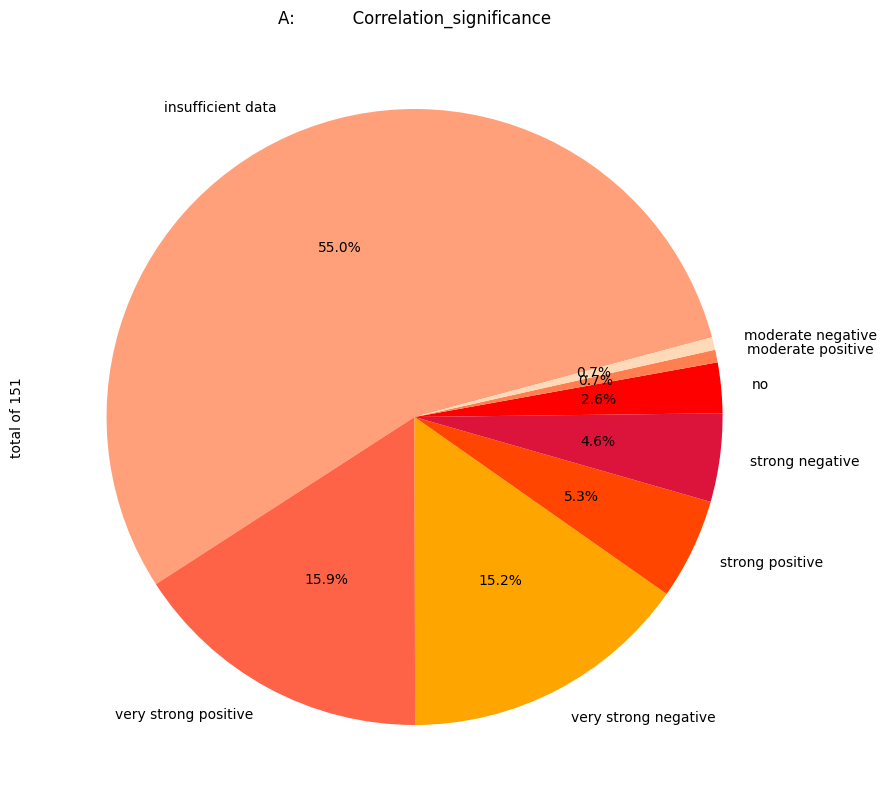

In [ ]:
all_corr_sig.plot.pie(title=['A:           Correlation_significance'],labels=['insufficient data', 'very strong positive', 'very strong negative', 'strong positive', 'strong negative', 'no','moderate positive', 'moderate negative'], ylabel='total of 151',subplots=True,autopct="%.1f%%",startangle=15,figsize=(20,10),colors=["LightSalmon", "Tomato", "Orange", "OrangeRed", "Crimson", "Red", "Coral", "PeachPuff"])


---


# **> CHART B**

Percentage of Correlation Significance between a country's GDP and its income inequality

*Excluding insufficient data*

---


array([<Axes: title={'center': 'B:           Correlation_significance'}, ylabel='total of 68'>],
      dtype=object)

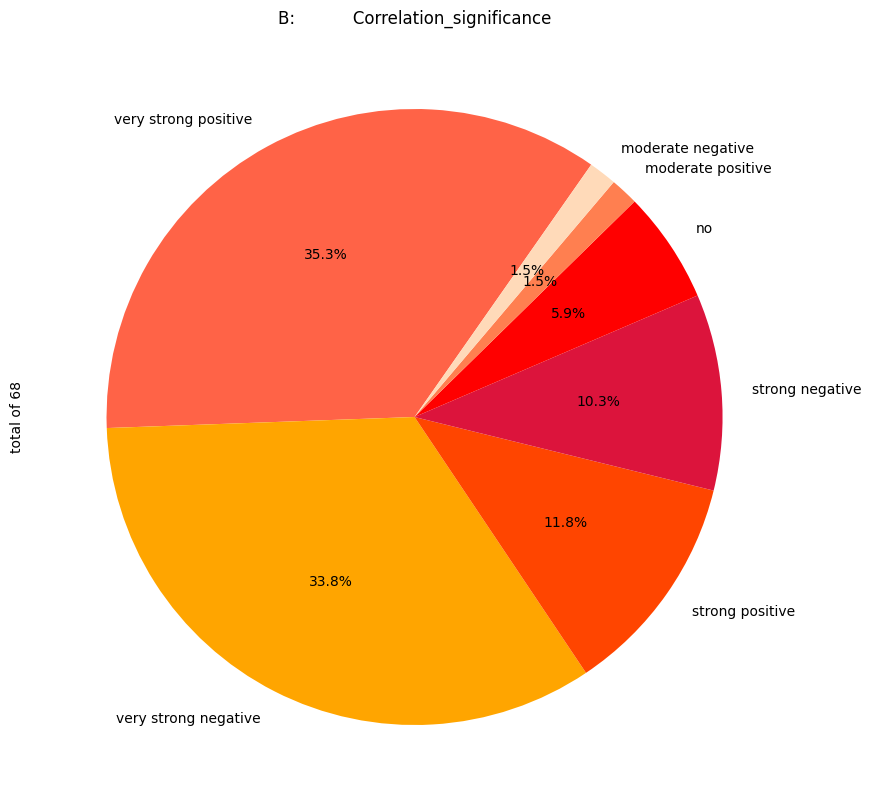

In [ ]:
top_corr_sig.plot.pie(title=['B:           Correlation_significance'],labels=['very strong positive', 'very strong negative', 'strong positive', 'strong negative', 'no','moderate positive', 'moderate negative'], ylabel='total of 68',subplots=True,autopct="%.1f%%", colors=["Tomato", "Orange", "OrangeRed", "Crimson", "Red", "Coral", "PeachPuff",],startangle=55,figsize=(20,10))